In [9]:
import PyPDF2
import os

# PDFファイルのリスト
file1 = r"input\DNP_夏_ES.pdf"
file2 = r"input\JR西日本_夏_IS_下書き2.pdf"
file3 = r"input\JR東日本_夏_ES.pdf"
file4 = r"input\三菱地所_es.pdf"

if not os.path.isdir("output"):
    os.mkdir("output")

output_file_name = r"output\summary.txt"

pdf_files = [file1, file2, file3, file4]

# テキストファイルに書き込むためのファイルを開く
with open(output_file_name, 'w', encoding='utf-8') as output_file:
    # 各PDFファイルを読み込む
    for pdf_file in pdf_files:
        # PDFファイルを開く
        with open(pdf_file, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            # 各ページを読み込む
            for page_number in range(len(reader.pages)):
                page = reader.pages[page_number]
                # ページの内容を抽出してテキストファイルに書き込む
                text = page.extract_text()
                output_file.write(text)
                output_file.write('\n')  # ページ間に改行を追加


In [14]:
import MeCab

## 形態素分析
def func1(input_file:str, output_file:str):
    '''
    何も書かれていない行があった場合
    '''
    tagger = MeCab.Tagger()
    with open(input_file, 'r', encoding="utf-8") as f1, open(output_file, 'w', encoding='utf-8') as f2:
        lines = f1.readlines()

        for line in lines:
            f2.write(tagger.parse(line))


func1(output_file_name, r"output\形態素解析結果.txt.mecab")


In [16]:
# 30

def func30(mecab_file:str) -> list:
    with open(mecab_file, "r", encoding="utf-8") as f:
        lines = f.readlines()
    results = [line.split("\t") for line in lines if line != "EOS\n"]
    
    mor = []
    sentence = []
    for result in results:
        list_temp = result[1].split(",")
        dict_temp = {
            "surface": result[0],
            "base": list_temp[6],
            "pos":list_temp[0],
            "pos1":list_temp[1]
        }
        mor.append(dict_temp)

    return mor

# 長いので先頭5行のみ表示
mecab_file = r"output\形態素解析結果.txt.mecab"
result30 = func30(mecab_file)
for i in result30[:10]:
    print(i)

{'surface': '私', 'base': '私', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
{'surface': 'グループ', 'base': 'グループ', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'ワーク', 'base': 'ワーク', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '連体化'}
{'surface': '際', 'base': '際', 'pos': '名詞', 'pos1': '非自立'}
{'surface': 'に', 'base': 'に', 'pos': '助詞', 'pos1': '格助詞'}
{'surface': 'チーム', 'base': 'チーム', 'pos': '名詞', 'pos1': '一般'}
{'surface': '内', 'base': '内', 'pos': '名詞', 'pos1': '接尾'}


In [25]:

# 35 単語の出現頻度
def func35(result30:list) -> list[dict]:
    dict_noun = {}
    for item in result30:
        if item["pos"] == "名詞":
            if item["surface"] in dict_noun:
                dict_noun[item["surface"]] += 1 
            else:
                dict_noun[item["surface"]] = 1
    
    list_35 = [{key:item} for key, item in dict_noun.items()]

    sorted_result35 = sorted(list_35, key=lambda item : list(item.values())[0], reverse=True)

    return sorted_result35

a = func35(result30)
print(a)

[{'こと': 40}, {'ため': 15}, {'練習': 15}, {'人': 13}, {'私': 12}, {'地域': 12}, {'部': 11}, {'事業': 10}, {'部員': 10}, {'まち': 10}, {'課題': 9}, {'化': 9}, {'活動': 9}, {'力': 9}, {'者': 8}, {'目': 8}, {'貴社': 8}, {'さ': 7}, {'大学': 7}, {'チーム': 6}, {'２つ': 6}, {'これ': 6}, {'２': 6}, {'興味': 6}, {'的': 5}, {'高校': 5}, {'向上': 5}, {'2': 5}, {'経験': 5}, {'住民': 5}, {'方': 5}, {'年': 5}, {'企画': 5}, {'１': 5}, {'年生': 5}, {'それ': 4}, {'統一': 4}, {'づくり': 4}, {'意欲': 4}, {'感': 4}, {'個々': 4}, {'時間': 4}, {'目標': 4}, {'新た': 4}, {'よう': 4}, {'工夫': 4}, {'社会': 4}, {'県': 4}, {'持続': 4}, {'性': 4}, {'促進': 4}, {'観光': 4}, {'調査': 4}, {'学年': 4}, {'議論': 4}, {'大会': 4}, {'３': 4}, {'学習': 4}, {'現在': 3}, {'解決': 3}, {'提案': 3}, {'環境': 3}, {'効率': 3}, {'時代': 3}, {'所属': 3}, {'バドミントン': 3}, {'同士': 3}, {'交流': 3}, {'１つ': 3}, {'次': 3}, {'スキル': 3}, {'実感': 3}, {'ノート': 3}, {'練': 3}, {'つながり': 3}, {'地': 3}, {'実現': 3}, {'強み': 3}, {'必要': 3}, {'関係': 3}, {'可能': 3}, {'現地': 3}, {'勉強': 3}, {'島原': 3}, {'の': 3}, {'際': 2}, {'内': 2}, {'プロジェクト': 2}, {'齟齬': 2}, {'改善': 2}, {'確認': 2}

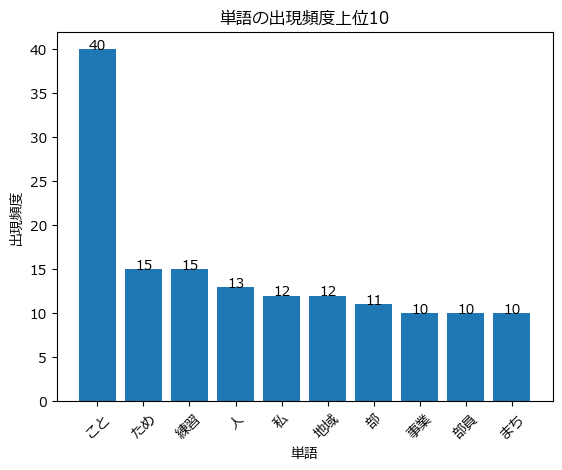

In [40]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Meiryo'
num_1 = 10
# 36 単語の出現頻度
def func36(result30:list) -> list[dict]:
    result35 = func35(result30)
    
    return result35[:num_1]

items = func36(result30)
x = [list(item.keys())[0] for item in items]
y = [list(item.values())[0] for item in items]

bars = plt.bar(x, y)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() /2.0, bar.get_height(), f"{bar.get_height()}", ha='center')

plt.xticks(rotation=45)
plt.xlabel('単語')
plt.ylabel('出現頻度')
plt.title(f'単語の出現頻度上位{num_1}')
plt.show()

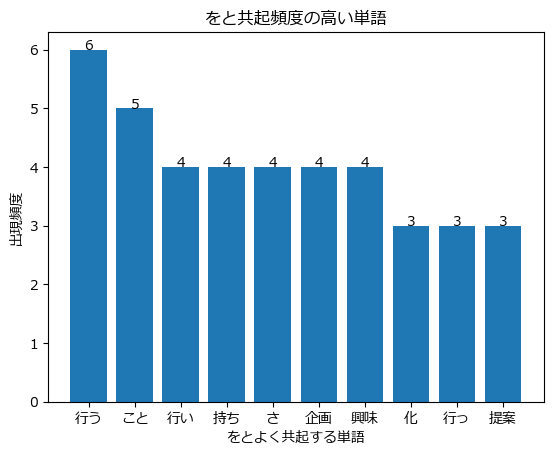

[{'行う': 6}, {'こと': 5}, {'行い': 4}, {'持ち': 4}, {'さ': 4}, {'企画': 4}, {'興味': 4}, {'化': 3}, {'行っ': 3}, {'提案': 3}]


In [39]:
# 37 「猫」と共起頻度の高い上位10語
keyword = "を"
def func37(result30: list, keyword, context_size: int =1, n: int = 10):
    '''
    「猫」の前後の１０単語を取得し、その数を記憶

    i:13
    '''
    dict37 = {}
    for i in range(len(result30)):
        if result30[i]["surface"] == keyword:                
            start = max(0, i - context_size)
            end = min(len(result30), i + context_size + 1)
            for j in range(start, end):
                if j != i:
                    word = result30[j]["surface"]
                    dict37[word] = dict37.get(word, 0) + 1
    # 高い順に並び替える
    list37 = [{key:item} for key, item in dict37.items()]
    sorted_list37 = sorted(list37, key=lambda item : list(item.values())[0], reverse=True)
    return sorted_list37[:n]

    

result37 = func37(result30=result30, keyword=keyword)
x, y = [list(item.keys())[0] for item in result37], [list(item.values())[0] for item in result37]
bars = plt.bar(x, y)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() /2.0, bar.get_height(), f"{bar.get_height()}", ha='center')

plt.xlabel(f"{keyword}とよく共起する単語")
plt.ylabel("出現頻度")
plt.title(f"{keyword}と共起頻度の高い単語")
plt.show()

# x, y = [key for key, _ in result37.items()], [item for _, item in result37.items()]
print(result37)